In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("../data/fnp-btc_data.csv")
df.head()

,Date,sentiment,sentiment_label,Open,High,Low,Close,Volume
0,2018-02-01,30,Fear,10269.843887,10332.946065,8700.332595,9171.249369,4.557095e+09
1,2018-02-02,15,Extreme Fear,9118.231270,9127.685961,7588.546351,8768.328115,5.511338e+09
2,2018-02-03,40,Fear,8763.536968,9417.790992,8173.729947,9191.270888,4.856473e+09
3,2018-02-04,24,Extreme Fear,9198.067914,9351.571884,7986.357859,8256.583798,3.993494e+09
4,2018-02-05,11,Extreme Fear,8215.505812,8343.181452,6665.107706,6905.959543,4.795002e+09


In [21]:
# make sure columns are real! 
df.columns

# make sure dates are real! preparation for time series analysis 
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
df.head() 

,Date,sentiment,sentiment_label,Open,High,Low,Close,Volume
0,2018-02-01,30,Fear,10269.843887,10332.946065,8700.332595,9171.249369,4.557095e+09
1,2018-02-02,15,Extreme Fear,9118.231270,9127.685961,7588.546351,8768.328115,5.511338e+09
2,2018-02-03,40,Fear,8763.536968,9417.790992,8173.729947,9191.270888,4.856473e+09
3,2018-02-04,24,Extreme Fear,9198.067914,9351.571884,7986.357859,8256.583798,3.993494e+09
4,2018-02-05,11,Extreme Fear,8215.505812,8343.181452,6665.107706,6905.959543,4.795002e+09


In [26]:
# construct log returns (dependent variable) 
# For each day, compute how much the price changes (in log terms) from today to tomorrow. 

df["log_price"] = np.log(df["Close"])
df["return_t1"] = df["log_price"].shift(-1) - df["log_price"]
df = df.dropna()

df.head()

,Date,sentiment,sentiment_label,Open,High,Low,Close,Volume,log_price,return_t1
0,2018-02-01,30,Fear,10269.843887,10332.946065,8700.332595,9171.249369,4.557095e+09,9.123829,-0.044927
1,2018-02-02,15,Extreme Fear,9118.231270,9127.685961,7588.546351,8768.328115,5.511338e+09,9.078901,0.047108
2,2018-02-03,40,Fear,8763.536968,9417.790992,8173.729947,9191.270888,4.856473e+09,9.126009,-0.107243
3,2018-02-04,24,Extreme Fear,9198.067914,9351.571884,7986.357859,8256.583798,3.993494e+09,9.018766,-0.178626
4,2018-02-05,11,Extreme Fear,8215.505812,8343.181452,6665.107706,6905.959543,4.795002e+09,8.840140,0.117749


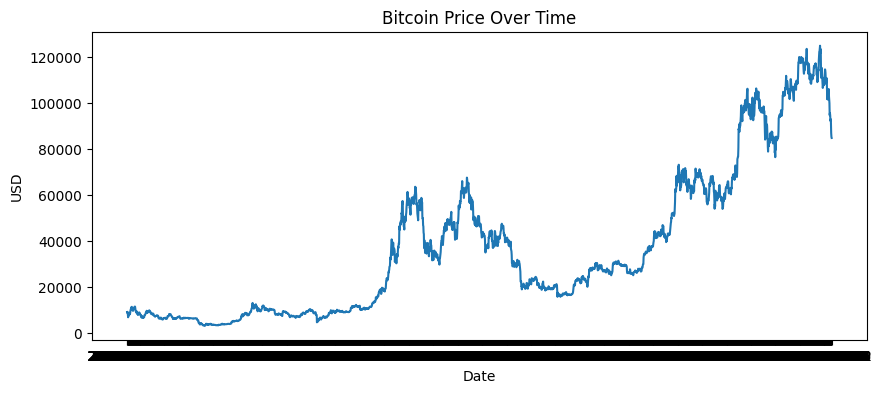

In [29]:
# plot bitcoin price over time 
plt.figure(figsize=(10,4))
plt.plot(df["Date"], df["Close"])
plt.title("Bitcoin Price Over Time")
plt.xlabel("Date")
plt.ylabel("USD")
plt.show()


In [ ]:
# plot